# Lab 1: Corpora and Tokenization
#### Accelerated Natural Language Processing (INFR11125)

## Welcome to the first lab session! Please read this intro first.

These labs are designed to build both **technical skills** and also **critical thinking** skills, and are intended to be done **in pairs**, using *Pair programming*, a method described below. 

So, sit down next to another student and introduce yourself so you can work together on one computer! Demonstrators will also be helping to pair up students.

### How to get the most out of the labs

We are releasing both the lab exercises and the lab solutions at once, so that if you get really stuck on something, or want to check your answer before moving on, you can. 

It might be tempting to:
- look at the solutions before you've thought through your own answer,
- not bother understanding our code, or
- skip over some of the questions and just run the code.
  
However, this is not going to help you develop your own skills or do well in this course!

A lot of your brain's learning happens by making predictions and then comparing them against what actually happens. You won't always be right, and that is completely fine! Think about why not, and check against the solutions or ask a demonstrator. 

We've included a lot of prompts in the labs to point out things you should be thinking about or asking yourself, hopefully not just in these labs but anytime you look at code, data, or explanations. The purpose of the labs is to help you learn how to think like an NLP practioner, not just for you to get the right answer.

Feel free to add new cells to type in your own notes or answers to the questions. If you get your partner's contact information, you can even download the notebook with your answers and send it to them.

You should aim to complete most or all of the lab during the scheduled session, so do keep an eye on the time and if you're getting bogged down in one section, it might be time to look at the solution to that part. (Note: there are 10 short sections in today's lab.)

### Different students, different backgrounds

This course includes students with many different backgrounds. We've tried to design the labs so that even if some parts seem too easy for you, other parts will be challenging. Specifically, in this lab,

- Students who are already comfortable with Python programming may find the level of programming easy, but please be patient if your partner is a beginning programmer. Don't just do all of the programming parts yourself---read below on using a pair programming structure and swapping roles.
- On the other hand, students with a purely technical background may find the questions about language much more challenging, while a student with a degree in linguistics might not!

We hope all students will find something new and interesting in the lab!

### We're asking you to use Pair Programming. What is that, and why?

Pair programming is an approach where two people work together, with specific roles, to write a program or solve a problem whilst **sharing a single keyboard and monitor**.

Pair programming is routinely used in the software industry to support better quality code. It has also shown benefits in educational settings, because it allows students to split up the cognitive load in a defined way, learn different kinds of skills, and practice communication.

In pair programming, each partner takes a specific role, and the partners **swap roles frequently** (every 10-15 min). The roles are:

- **Driver:** deals with details. They control the keyboard and mouse, and write the code or other solutions, as instructed by the navigator.

- **Navigator:** thinks higher level. They support the driver by suggesting approaches and alternatives, watching for errors, and checking back over the written instructions to make sure all taks/questions are answered.

You may find one of these roles easier or more natural than the other, depending on your personality, programming abilities, English language skills, or other factors. That's ok! 

- It's good to practice both roles, and we will remind you periodically during the lab session to swap roles.

- Be patient and respectful of your partner, whichever role they are in. Remember that everyone brings different skills and experience to the task.

## What you will learn in this lab

Today we are focusing on some fundamental tools and concepts for working with language data.

### Tools: Hugging Face datasets and tokenizers

Throughout this course we'll be using the Hugging Face Hub, a centralized online repository for a wide range of NLP datasets and models.

In this lab, you will learn how to:
- download a corpus (dataset) from the Hugging Face Hub, using the `datasets` library
- use Hugging Face data structures to explore linguistic data and annotations
- tokenize data with BPE, using the Hugging Face `transformers` library

### Concepts: word and subword statistics

We'll work with a **parallel corpus**, the Nunavut Hansard corpus. Like the Europarl corpus we discussed in the lectures, this corpus contains parliamentary proceedings, but in this case for the Nunavut province of Canada. The proceedings have been translated into both English and Inuktitut, an indigenous language in Nunavut with about 30,000 speakers.

After working through the lab, you should be able to:
- explain some of the similarities and differences between languages in terms of **word statistics and sub-word structure**
- explain how BPE affects token statistics, and **how** the tokens may differ depending on whether BPE was trained on the **same language** as it's being applied to, or on a **different language**.
  

# Part 1: Downloading and exploring the data

## 1. What is Hugging Face?

Hugging Face is an AI company that provides a centralized repository, the Hugging Face Hub, which is widely used in NLP. There are many useful datasets and models on the Hub, and we'll be using some of them in this course. 

However, you should also be careful when using resources from the Hub, because anyone can create an account and upload datasets or models. So you don't necessarily know if the the resources are high quality, or may have ethical issues. We'll talk about some of these issues later in the course.

Hugging Face also provides Python libraries that provide standardized interfaces for the datasets and models, so it's easy to swap between different datasets and models without changing your own code. Today we'll be using the `datasets` and `transformers` libraries. 

## 2. What data are we using today?

In today's lab, we will be using a dataset that we preprocessed and uploaded to the Hugging Face Hub specially for ANLP!

Our dataset fomes from the Nunavut Hansard corpus. Like the Europarl corpus that was discussed in the lectures, this is a **parallel corpus** containing parliamentary proceedings in different languages. But here it's the parliament for the Nunavut province of Canada. 

The proceedings have been translated into both **English** and **Inuktitut**, an indigenous language spoken in Nunavut with about 30,000 speakers. 

If you want, you can look briefly at the Hugging Face Hub page for the data [here]( https://huggingface.co/datasets/EdinburghNLP/nunavut-hansard-plusplus), then go to the next step.

**YOU TRY:** Execute the following cell to download the data from Hugging Face. Notice we are creating two separate datasets, one for each language, and taking only the first 100k lines of data from the "train" split. We'll be talking about dataset splits late in Week 2, so don't panic if you aren't familiar with this term yet! 

**Note**: the first time you run this, it will take about 30-60 sec to download 5 files. You might get an error about pip's dependency resolver---just ignore this!

In [1]:
!pip install -U datasets
from datasets import load_dataset
# We need to specify which dataset, which subset of it, and which split.
data_eng = load_dataset("EdinburghNLP/nunavut-hansard-plusplus", "english", split="train[:100000]") 
data_iku = load_dataset("EdinburghNLP/nunavut-hansard-plusplus", "inuktitut", split="train[:100000]")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 90.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 20.0.0
    Uninstalling pyarrow-20.0.0:
      Successfully uninstalled pyarrow-20.0.0━━━ 0/3 [pyarrow]
  Attempting uninstall: multiprocess━━━━━━━━━━━━ 0/3 [pyarrow]
    Found existing installation: multiprocess 0.70.18m0/3 [pyarrow]
    Uninstalling multiprocess-0.70.18:━━━━━━ 0/3 [pyarrow]
      Successfully uninstalled multiprocess-0.70.1832m0/3 [pyarrow]
  Attempting uninstall: datasets━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/3 [multiprocess]
    Found existing installation: datasets 2.2.1━━━━━━━━━━━━━━━ 1/3 [multiprocess]
    Uninstalling datasets-2.2.1:━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/3 [multiprocess]
      Successfully uninstalled datasets-2.2.1━━━━━━━━━━━━━ 2/3 [datasets]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [datasets]2/3 [datasets]


README.md: 0.00B [00:00, ?B/s]

NunavutHansard.en.jsonl:   0%|          | 0.00/934M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/673680 [00:00<?, ? examples/s]

NunavutHansard.iu.rom.jsonl:   0%|          | 0.00/897M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/670378 [00:00<?, ? examples/s]

## 3. A first look at the data

It's always a good idea to have a look at your data, to get a sense of what's in it and to make sure you understand the formatting! 

(Looking at the data is also useful later on in developing a system, for example to diagnose errors. )

**YOU TRY:** Run the following code to print out the first few lines of each corpus. Does it look like what you would expect from parliamentary proceedings? Can you guess what the word for "first" is in Inuktitut?

In [2]:
from pprint import pp # this helps print large python objects in a more readable way
print("@@ ENGLISH @@")
pp(data_eng["text"][:10])
print("@@ INUKTITUT @@")
pp(data_iku["text"][:10])

@@ ENGLISH @@
['LEGISLATIVE ASSEMBLY OF NUNAVUT',
 '1st Session',
 '1st Assembly',
 'HANSARD',
 'Official Report',
 'THURSDAY, APRIL 1, 1999',
 'Legislative Assembly of Nunavut',
 'Members of the Legislative Assembly',
 'Mr. Ovide Alakannuark',
 '(Akulliq)']
@@ INUKTITUT @@
['nunavut maligaliurvia',
 'sivuliqpaat katimaniq',
 'sivuliqpaat maligaliurvik',
 'maligaliuqtiit katimautigisimajangitta',
 'titiraqsimaningit',
 'sitamiq, ipuru 1, 1999',
 'nunavut maligaliurvia',
 'maligaliurtiit',
 'uuviq alakkannuaq',
 '(akulliq)']


One thing you might notice about the beginning of the corpus is there are no full sentences. Let's look at a later portion to try to find some.

**YOU TRY**: Complete the following code to print out some sentences from a bit later in the corpus, then run it! (If you want to, you can change the range of indices to look at some other parts of the corpus too.) Then consider:

1. Based on what you can see, do you think this corpus is *sentence-aligned* or not? That is, are the ENG and IKU sentences with the same ID number always translations of each other, or could the sentences be split up differently in the two languages? Give specific evidence to support your answer.

2. What's another way you could check whether the ENG and IKU subsets are sentence-aligned?

In [8]:
for i in range(100,110):
    print(f'ENG {i}: {pp(data_eng['text'][i])}') # fix to print the i'th English sentence (look at previous code cell for hints)
    print(f'IKU {i}: {pp(data_iku['text'][i])}') # fix to print the i'th Inuktitut sentence

'Mr. Quirke (Clerk-Designate): Thank you.'
ENG 100: None
'>> tutsiarniq'
IKU 100: None
('I would like to ask Bishop Idlout and John Homann to perform the opening '
 'prayer.')
ENG 101: None
'mis puukisan ( titiraqtiup tungilinga - tikkuaqtausimajuq ): qujannamiik.'
IKU 101: None
'>>Prayer'
ENG 102: None
'tatigiikkut ammalu iqaluit qilaujjaqtingit inngirnialirmijut qilaujjarlutillu.'
IKU 102: None
'Ms. Perkison (Deputy-Clerk Designate) (interpretation): Thank you.'
ENG 103: None
'>> inngiqtut qilaujjaqtullu.'
IKU 103: None
('The Tatiigiit Group and the Iqaluit Drummers will now perform singing and '
 'drumming.')
ENG 104: None
'mis puukisan: katajjaqtit pinnguarnialirmijut.'
IKU 104: None
'>>Song and Drum Dancing'
ENG 105: None
'>> katajjaqtut.'
IKU 105: None
'Ms. Perkison (interpretation): We will now have the throat singers perform.'
ENG 106: None
('mis puukisan: tunngasuktitainnarijumavatsi sivulliqpaarijangannik '
 'katimaniqaqtillugu sivulliqpaami nunavuup maligaliurvinganni.')
IKU

## 4. Looking deeper: tokens and lemmas

So far, we've just looked at the `["text"]` field of the dataset, but there is more information available. 

**YOU TRY:** Run the following cell to print out a full row from the English data. What fields does each row include? What information is available for each token? (*Warning:* the additional info for each token was annotated automatically using NLP tools, so there could be errors!)

Text tokens（word itself, its part of speech, and its lemma.）

In [9]:
print("English:")
pp(data_eng[206])

English:
{'text': 'To the peoples of Canada and their governments, in each province and '
         'territory, who have supported Nunavut over the years: we thank you '
         'with all our hearts, and we are proud to join you.',
 'tokens': [{'text': 'To', 'pos': 'ADP', 'lemma': 'to'},
            {'text': 'the', 'pos': 'DET', 'lemma': 'the'},
            {'text': 'peoples', 'pos': 'NOUN', 'lemma': 'people'},
            {'text': 'of', 'pos': 'ADP', 'lemma': 'of'},
            {'text': 'Canada', 'pos': 'PROPN', 'lemma': 'Canada'},
            {'text': 'and', 'pos': 'CCONJ', 'lemma': 'and'},
            {'text': 'their', 'pos': 'PRON', 'lemma': 'their'},
            {'text': 'governments', 'pos': 'NOUN', 'lemma': 'government'},
            {'text': ',', 'pos': 'PUNCT', 'lemma': ','},
            {'text': 'in', 'pos': 'ADP', 'lemma': 'in'},
            {'text': 'each', 'pos': 'DET', 'lemma': 'each'},
            {'text': 'province', 'pos': 'NOUN', 'lemma': 'province'},
            {'te

**YOU TRY:** Now, run the cell below to look at the corresponding sentence from Inuktitut.

1. What information do you see there that was not in the English data?
2. Based on the data you have seen so far (here or in previous parts of the lab), do you think Inuktitut is *more* or *less*  morphologically rich than English? Why?

1. lemma_trans
2. Yes, Rich than English, one word contains the meaning of a sentence. lemma is much shorter

In [10]:
print("Inuktitut:")
pp(data_iku[200]) #This is the translation of sentence 206 in ENG, which you printed above.

Inuktitut:
{'id': 206,
 'text': 'inuqutigijaujunut kanatami gavamarijanginnullu, atuni '
         'avittuqsimajuit, ikajuqtuisimajut arraagugasannut nunavuumik: '
         'uummatittinnut tamainnut qujannamiiqpatsi, ammalu upigusutsiaqpugut '
         'ilaliutiqataugiamik.',
 'tokens': [{'text': 'inuqutigijaujunut',
             'pos': 'NOUN',
             'lemma': 'inuk',
             'lemma_trans': '(1) human being; person (2) member of the Inuit '
                            'race (3) playing card; chess pawn; member of a '
                            'side in a game or contest'},
            {'text': 'kanatami',
             'pos': 'NOUN',
             'lemma': 'kanata',
             'lemma_trans': 'Canada'},
            {'text': 'gavamarijanginnullu',
             'pos': 'NOUN',
             'lemma': 'gavama',
             'lemma_trans': 'government'},
            {'text': ',', 'pos': 'PUNCT', 'lemma': ',', 'lemma_trans': ','},
            {'text': 'atuni',
             'pos': 'NO

# Part 2: Word frequencies and Zipf plots

Now that we have some idea of what our data looks like, and an initial hypothesis about the morphology of Inuktitut, let's see whether we can find further support for that hypothesis by looking at corpus statistics.

In particular, we will do some simple analyses just based on word frequencies. 

## 5. Collecting word frequencies

Let's start by collecting the word frequencies. 

**YOU TRY:** Take a look at the code below, and talk through it with your partner to make sure you both understand how it works. For example,

- What does the code loop over? 
- What is stored as a "word" in Inuktitut, and what are the keys and values of the dictionary that the function returns? 
- Is every token counted?

**FOLLOW-UP QUESTION:** Is it possible that the way Inuktitut words are treated here might cause errors in our counting? Why or why not?

In [12]:
from tqdm import tqdm # allows to get progress bars
def compute_frequencies(dataset):
    ''' Takes the dataset with each row containing a 'tokens' field (list of tokens), 
    and returns a dictionary with the counts of all words in the data. 
    If the dataset contains lemma translations, the translation is appended to each "word".'''
    counter = {}
    for row in tqdm(dataset):
        for token in row['tokens']:
            # skip punctuation
            if token['pos'] in ['PUNCT', 'SYM']:
                continue
            if "lemma_trans" in token:
                # for Inuktitut, we'll show both the word and the translation
                # of the lemma, so we can understand the data better.
                word = token['text'].lower() + " (" + token['lemma_trans'] +")"
            else:
                # upper or lower case shouldn't matter,
                # so we'll make all words lower case
                word = token['text'].lower()
            if word not in counter:
                counter[word] = 1
            else:
                counter[word] += 1
    return counter

**YOU TRY:** Now, let's actually compute the frequencies!
1. Run the cell above to define the `compute_frequencies` function.
2. Next, add code in the cell below to call the function on your datasets, so that `count_eng` and `count_iku` store the two dictionaries of word counts.
3. Run your code to compute the frequencies. It will take a few seconds, so in the meantime go to the next cell and fix the code to print out the frequencies of the four English words. Which one do you expect to have the highest frequency? The lowest? 

In [13]:
count_eng = compute_frequencies(data_eng) # add code here to compute frequencies on ENG data
count_iku = compute_frequencies(data_iku)# add code here to compute frequencies on IKU data

100%|██████████| 100000/100000 [00:16<00:00, 5889.72it/s]


In [18]:
print ("Frequencies in English data:")
for word in ["on", "window", "happy", "went"]:
    print(count_eng[word]) # change this to print out the word and its frequency

Frequencies in English data:
13241
28
340
419


## 6. Comparing Zipf plots

**YOU TRY:** Run the code below to create Zipf plots for both languages, and then scroll down to answer the questions about them.


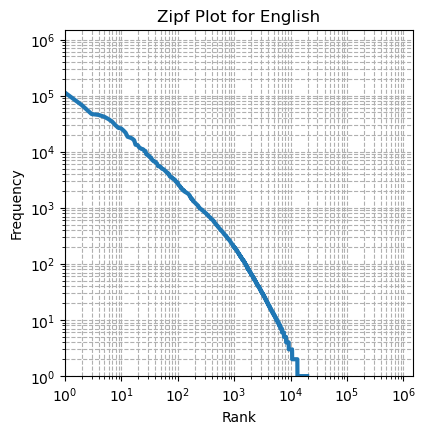

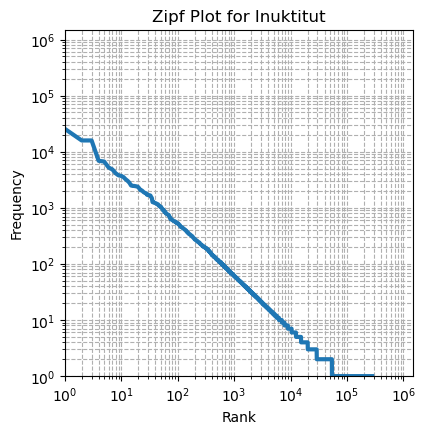

In [20]:
import matplotlib.pyplot as plt
import numpy as np
def plot_zipf(counter, language):
    ''' Takes a dictionary of word counts, and a string with the language name.
    Produces a Zipf plot (rank vs frequency, on log scales) '''
    freqs = np.array(sorted(counter.values(), reverse=True))
    ranks = np.arange(1, len(freqs) + 1)

    plt.figure(figsize=(4.5, 4.5))
    plt.plot(ranks, freqs, linewidth=3)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(1, 1.5e6)
    plt.ylim(1, 1.5e6)
    plt.grid(True, which="both", ls="--")
    plt.xlabel("Rank")
    plt.ylabel("Frequency")
    plt.title(f"Zipf Plot for " + language)
    plt.show()

plot_zipf(count_eng, "English")
plot_zipf(count_iku, "Inuktitut")

**QUESTION:** Compare the English and Inuktitut Zipf plots. Based on these plots, which language is morphologically richer, and how can you tell? Do the patterns you see here match what you thought earlier about English vs. Inuktitut morphology?

## 7. More details

Let's look in a little bit more detail at some of what we can see in the plots, to further confirm our hypothesis about Inuktitut morphology.

**YOU TRY:** 

1. Based on the Zipf plots above, roughly how many *word types* (unique words) are in each dataset, and how does this relate to morphology?
2. In light of the previous question, why did we use a parallel corpus for this study?
3. Now complete and run the code below to compute the exact number of word types and confirm your estimates. *Hint:* Check the number of items in the `count_eng` and `count_iku` objects.

In [22]:
# put code for counting the number of items here.
print("English word types:", len(count_eng))
print("Inuktitut word types:", len(count_iku))

English word types: 19661
Inuktitut word types: 279223


Finally, let's take a look at the most frequent words in each language. We'll do this by casting (converting) our word count dicts into Counter objects, and using the `most_common` function of Counters.

If you are not familiar with Counters, you might want to look up the documentation (now or after the lab) to see what other functions they provide. They can be very useful for simple analyses of text data! (In fact, we could have used Counters in the first place, rather than dicts. As an exercise for later, you could try rewriting the `compute_frequencies` function using Counters.)

**YOU TRY:** Run the following code and look at the results to answer the questions:
1. What are some differences you notice between the top English words and the top Inuktitut words? You should be able to name at least three differences.
2. How might these differences relate to the morphology of Inuktitut? *Hint:* If you're not sure, look back at the lecture slides on *case* (end of W1/L2) and *agreement* (middle of W1/L3).
3. You might also notice some evidence that the automatic preprocessing might have led to some errors. What's the evidence? (Don't spent ages on this if you can't find it; ask a demonstrator or look at the solutions when available.)


In [23]:
from collections import Counter
pp(Counter(count_eng).most_common(20))
pp(Counter(count_iku).most_common(20))

[('the', 114096),
 ('to', 68054),
 ('of', 46956),
 ('and', 45232),
 ('that', 42048),
 ('i', 38088),
 ('in', 34036),
 ('we', 29392),
 ('a', 26548),
 ('is', 26008),
 ('for', 23888),
 ('mr.', 21812),
 ('have', 18516),
 ('are', 18054),
 ('be', 17585),
 ('it', 16895),
 ('this', 16040),
 ('you', 13299),
 ('on', 13241),
 ('will', 12801)]
[('amma (and)', 25686),
 ('ammalu (and)', 15868),
 ('ammalu (to be punctured or ripped; to be cleared or unplugged)', 15868),
 ('uqaqtii (to speak; to say something (trans.: to s.o.))', 6880),
 ('tamanna (this one right here)', 6683),
 ('minista (minister)', 5232),
 ('tusaajitigut (interpreter)', 4830),
 ('3 (3)', 4130),
 ('uqaqti (to speak; to say something (trans.: to s.o.))', 3791),
 ('mista (mister)', 3708),
 ('kisiani (but)', 3533),
 ('qujannamiik (thank you!)', 3229),
 ('nunavut (Nunavut)', 3027),
 ('inuit ((1) human being; person (2) member of the Inuit race (3) playing '
  'card; chess pawn; member of a side in a game or contest)',
  2801),
 ('iksivau

# Part 3: Byte-pair encoding

In class, we talked about **byte-pair encoding (BPE)** as a way of dealing with unseen words. This should be especially helpful for a language as morphologically rich as Inuktitut. Let's train some byte-pair encoding models and see how it affects the Zipf plots for English and Inuktitut!

## 8. Tokenizing the data

Once again, there's no need for us to implement BPE from scratch. Hugging Face also has the `tokenizers` library, which implements efficient versions of BPE and related algorithms. We already used it to train BPE tokenizers on our English and Inuktitut data and uploaded them to the Huggingface Hub. 

**YOU TRY:** Run the next three cells to compute frequencies of the BPE-tokenized data. These cells will:
1. Download our pre-trained tokenizers using `AutoTokenizer` from the `transformers` library;
2. Define a modified version of our previous `compute_frequencies` function, to compute frequencies based on the BPE tokens; and 
3. Actually compute the frequencies, by calling `compute_frequencies_tok`. This will take a minute or two to run, so scroll down and start thinking about the next question while it's running.

In [24]:
from transformers import AutoTokenizer
tokenizer_eng = AutoTokenizer.from_pretrained('anlp-uoe/nunavut-hansard-eng')
tokenizer_iku = AutoTokenizer.from_pretrained('anlp-uoe/nunavut-hansard-iku')

tokenizer_config.json:   0%|          | 0.00/587 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/587 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

In [25]:
def compute_frequencies_tok(dataset, tokenizer):
    ''' Takes a dataset with each row containing a 'tokens' field (list of tokens), 
    and a tokenizer. Tokenizes the data using the tokenizer, 
    and returns a dictionary with the token counts (excluding punctuation).'''
    counter = {}
    for row in tqdm(dataset):
        for token in row['tokens']:
            # skip punctuation
            if token['pos'] in ['PUNCT', 'SYM']:
                continue
            subtokens = tokenizer.tokenize(token['text'])
            for subtoken in subtokens:
                word = subtoken.lower()
                if word not in counter:
                    counter[word] = 1
                else:
                    counter[word] += 1
    return counter

In [26]:
# Compute frequencies on both datasets
count_eng_tok = compute_frequencies_tok(data_eng, tokenizer_eng)
count_iku_tok = compute_frequencies_tok(data_iku, tokenizer_iku)

100%|██████████| 100000/100000 [01:14<00:00, 1333.66it/s]


 ## 9. Analyzing the effects of BPE

**BEFORE you run the code below**, try to predict how the Zipf plots will look like, now that we have tokenized the  data using BPE. It might help to know that we used a BPE vocabulary size of 10,000.

**YOU TRY:** After you have discussed your predictions with your partner, *then* run the code to see if you were right! If you see anything unexpected in the results, can you figure out why? Does the data still obey Zipf's law? Why or why not?

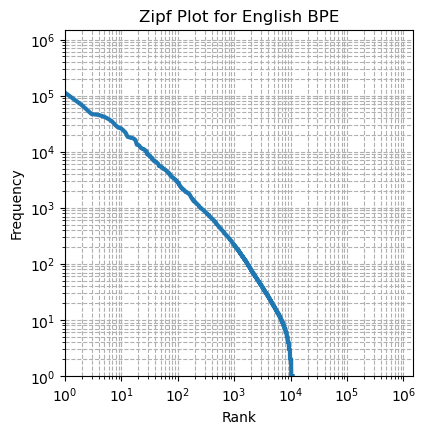

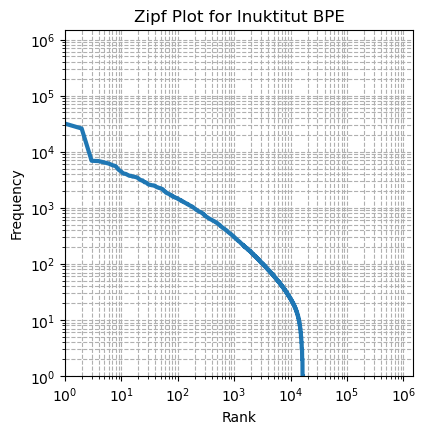

In [27]:
# Plot the data!
plot_zipf(count_eng_tok, "English BPE")
plot_zipf(count_iku_tok, "Inuktitut BPE")

**YOU TRY:** Based on what you know about BPE and these languages, do you expect that after running BPE, the most frequent tokens will have changed? What about the least frequent tokens? To see if you're right, use the function we've defined below to explore the most and least frequent tokens. (You'll need to add some code of your own that calls this function.)

In [28]:
def print_most_frequent(counts, label, N=10):
    ''' Takes a dict of counts and a string label identifying what the counts are, 
    and prints the top N most frequent items with their counts. 
    If N is negative, it prints the least frequent items instead. '''
    if N >= 0:
        print("**", N, "most frequent tokens in", label, "**")
        pp(Counter(counts).most_common(N))
    else:
        print("**", -1*N, "least frequent tokens in", label, "**")
        pp(Counter(counts).most_common()[N:])

In [31]:
print_most_frequent(count_eng, "eng")
print_most_frequent(count_eng_tok, "tok_eng")
print_most_frequent(count_iku, "iku")
print_most_frequent(count_iku_tok, "tok_iku")# add your code here

** 10 most frequent tokens in eng **
[('the', 114096),
 ('to', 68054),
 ('of', 46956),
 ('and', 45232),
 ('that', 42048),
 ('i', 38088),
 ('in', 34036),
 ('we', 29392),
 ('a', 26548),
 ('is', 26008)]
** 10 most frequent tokens in tok_eng **
[('▁the', 114115),
 ('▁to', 68126),
 ('▁of', 46949),
 ('▁and', 45236),
 ('▁that', 42048),
 ('▁i', 38210),
 ('▁in', 34193),
 ('▁we', 29425),
 ('▁a', 26836),
 ('▁is', 26028)]
** 10 most frequent tokens in iku **
[('amma (and)', 25686),
 ('ammalu (and)', 15868),
 ('ammalu (to be punctured or ripped; to be cleared or unplugged)', 15868),
 ('uqaqtii (to speak; to say something (trans.: to s.o.))', 6880),
 ('tamanna (this one right here)', 6683),
 ('minista (minister)', 5232),
 ('tusaajitigut (interpreter)', 4830),
 ('3 (3)', 4130),
 ('uqaqti (to speak; to say something (trans.: to s.o.))', 3791),
 ('mista (mister)', 3708)]
** 10 most frequent tokens in tok_iku **
[('▁ammalu', 31802),
 ('▁amma', 25931),
 ('▁uqaqtii', 6898),
 ('▁tamanna', 6804),
 ('tigut',

In [32]:
print_most_frequent(count_eng, "eng",-10)
print_most_frequent(count_eng_tok, "tok_eng",-10)
print_most_frequent(count_iku, "iku",-10)
print_most_frequent(count_iku_tok, "tok_iku",-10)

** 10 least frequent tokens in eng **
[('russ', 1),
 ('blanchette', 1),
 ('anaktak', 1),
 ('constitutent', 1),
 ('goethe', 1),
 ('tamlyn', 1),
 ('o’shaughnassy', 1),
 ('tayeurr', 1),
 ('rideout', 1),
 ('akuak', 1)]
** 10 least frequent tokens in tok_eng **
[('▁pret', 1),
 ('obb', 1),
 ('▁ton', 1),
 ('▁surve', 1),
 ('▁feder', 1),
 ('bec', 1),
 ('ross', 1),
 ('ether', 1),
 ('▁mccull', 1),
 ('ugh', 1)]
** 10 least frequent tokens in iku **
[('ikajuusiaqtittijjutinik (head strap for carrying heavy weights)', 1),
 ('qimirrulauqtuq (to scan, scrutinize, inspect s.t.; with no object: to be '
  'scanned, scrutinized, inspected)',
  1),
 ('naillititsisimajut (name)', 1),
 ('tusalauqtaminik (to hear (trans.: something))', 1),
 ('takulauqtaminik (to see (trans.: s.t.))', 1),
 ('atuliqujaliarisimajangit ([-R]to /use s.t.; to /occupy s.t.)', 1),
 ('46-ngujut (46-ngujut)', 1),
 ('ikajuusiaqtittijjutivut (head strap for carrying heavy weights)', 1),
 ('piuniksauqullugit (thing)', 1),
 ('ikajuqtaugial

## 10. Cross-language BPE

In the previous section, we used tokenizers that were trained separately on English and Inuktitut, using the same vocabulary size.

However, today's large language models use a shared tokenizer for all data, and that tokenizer is trained primarily on English data. This can cause problems for other languages, for two reasons:
- Languages differ in terms of *orthography* (how the language is written, including the alphabet as well as rules for spelling, punctuation, and capitalization). 
- Languages also have different statistics over character sequences, or $n$-grams, as we'll see in more detail in Week 2 lectures and Lab 2.

We don't have one of these multi-lingual tokenizers here, but we can simulate some of the effects by just running our English tokenizer on the Inuktitut data.

**YOU TRY:** Before running the code below to create the Zipf plot and print out the top and bottom words, try to predict what you think might happen if we tokenize the Inuktitut data using the English tokenizer. For example, compared to when we tokenize using the Inuktitut tokenizer,
1. Will the most frequent token be more frequent, less frequent, or the same?
2. Will the highest rank be the same, lower, or higher? What would each of these indicate?
3. What do you think the most or least frequent tokens might look like?
   
   As usual, then run the code, and see whether you find anything different from what you expected, and if so, whether you can explain what happened.


100%|██████████| 100000/100000 [02:37<00:00, 634.03it/s]


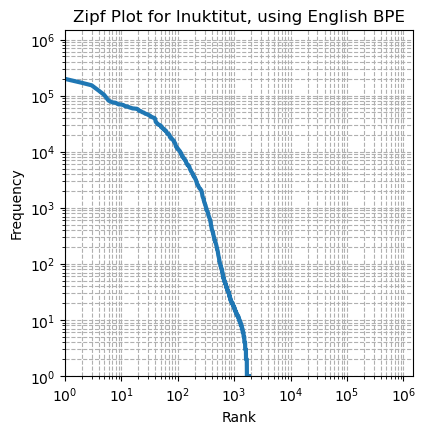

In [34]:
count_iku_mistok = compute_frequencies_tok(data_iku, tokenizer_eng)
plot_zipf(count_iku_mistok, "Inuktitut, using English BPE")

In [36]:
print_most_frequent(count_iku_tok, "Inuktitut BPE", 20)
print_most_frequent(count_iku_mistok, "Inuktitut with English BPE", 20)
print_most_frequent(count_iku_tok, "Inuktitut BPE", -20)
print_most_frequent(count_iku_mistok, "Inuktitut with English BPE", -20)

** 20 most frequent tokens in Inuktitut BPE **
[('▁ammalu', 31802),
 ('▁amma', 25931),
 ('▁uqaqtii', 6898),
 ('▁tamanna', 6804),
 ('tigut', 6427),
 ('▁tusaaji', 6161),
 ('-1', 5755),
 ('▁minista', 5531),
 ('it', 4789),
 ('▁3', 4436),
 ('ni', 4060),
 ('▁uqaqti', 4030),
 ('mut', 3866),
 ('nut', 3723),
 ('▁mista', 3710),
 ('▁kisiani', 3602),
 ('li', 3587),
 ('mi', 3541),
 ('nga', 3486),
 ('mik', 3374)]
** 20 most frequent tokens in Inuktitut with English BPE **
[('ut', 199322),
 ('a', 169462),
 ('i', 152668),
 ('un', 122979),
 ('u', 103077),
 ('ik', 81467),
 ('ir', 75842),
 ('iq', 74421),
 ('q', 69814),
 ('▁t', 69481),
 ('it', 67670),
 ('▁', 64046),
 ('at', 63987),
 ('ig', 61642),
 ('aq', 60468),
 ('▁k', 59025),
 ('▁u', 58899),
 ('▁n', 58426),
 ('▁amm', 58318),
 ('inn', 56346)]
** 20 least frequent tokens in Inuktitut BPE **
[('▁arraagutamaaqsiummut', 1),
 ('he', 1),
 ('▁di', 1),
 ('ruluit', 1),
 ('luavut.', 1),
 ('▁mappigangani', 1),
 ('▁kappani', 1),
 ('▁aanniaqarnangittulirijikku', 1),

## &#127881; &#127881; Congratulations! You're done! &#x1F680; 

We hope you found this lab interesting, and that some of the libraries and coding patterns will be useful going forward!

As a completely optional follow-up activity, you might be interested in looking at some further statistics related to BPE, such as the *fertility* (the average number of tokens per word) or the average token length. Given what you have seen so far, what would you expect to find in the two languages? What about if you compare the Inuktitut data as tokenized by the Inuktitut versus the English tokenizer?

Feel free to explore these questions or look at other languages on your own!